# Data Exploration

In [315]:
#importing important libraries
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [316]:
#loading the test and train dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [317]:
train.shape

(12980, 12)

In [318]:
test.shape

(4399, 11)

In [319]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
5,2011-01-01 5:00:00,1,0,0,2,9.84,12.880,75.0,6.0032,0,1,1
6,2011-01-01 6:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,2,0,2
7,2011-01-01 7:00:00,1,0,0,1,8.20,12.880,86.0,0.0000,1,2,3
8,2011-01-01 8:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,1,7,8
9,2011-01-01 9:00:00,1,0,0,1,13.12,17.425,76.0,0.0000,8,6,14


In [320]:
test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7
5,2012-06-30 6:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,6,36
6,2012-06-30 7:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,10,82
7,2012-06-30 8:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,26,168
8,2012-06-30 9:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,41,234
9,2012-06-30 10:00:00,3,0,0,1,36.08,38.635,30.0,16.9979,96,308


In [321]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [322]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [323]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Univariate Analysis

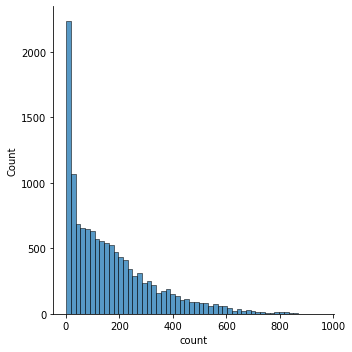

In [324]:
#distribution of count variable
sn.displot(train['count'])

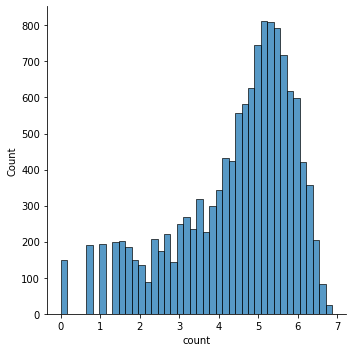

In [325]:
sn.displot(np.log(train['count']))

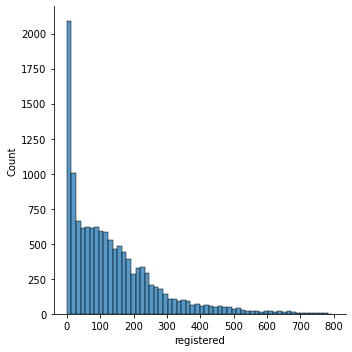

In [326]:
sn.displot(train['registered'])

# Bivariate analysis

<AxesSubplot:>

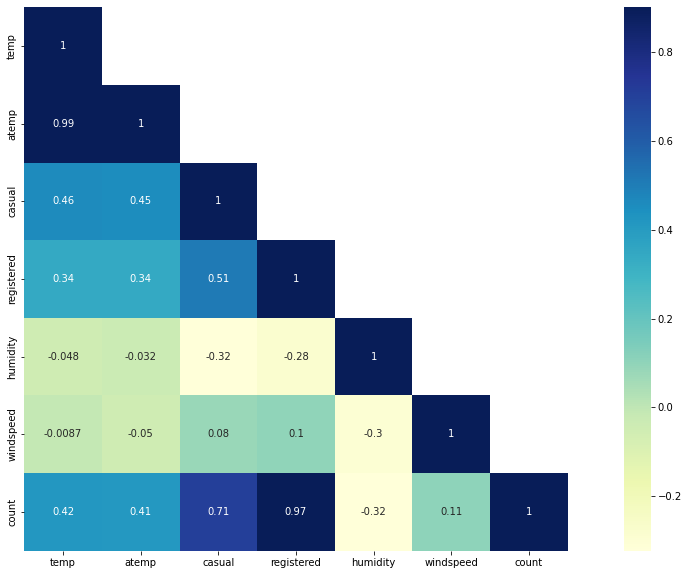

In [327]:
# looking at the correlation between numerical variables
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

## From above heat map we deduce the following things:
### 1. Temp and humidity features has got positive and negative correlation with count respectively. Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity"
### 2. Windspeed will not be really useful numerical feature and it is visible from it correlation value with "count"

In [328]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [329]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [330]:
train["date"]=train.datetime.apply(lambda x:x.split()[0])
train["date"]

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
12975    2012-06-29
12976    2012-06-29
12977    2012-06-29
12978    2012-06-29
12979    2012-06-30
Name: date, Length: 12980, dtype: object

In [331]:
train["hour"]=train.datetime.apply(lambda x:x.split()[1].split(":")[0])
train["hour"]

0         0
1         1
2         2
3         3
4         4
         ..
12975    20
12976    21
12977    22
12978    23
12979     0
Name: hour, Length: 12980, dtype: object

In [332]:
train["month"]=train.date.apply(lambda dateString: datetime.strptime(dateString,"%Y-%m-%d").month)
train["month"]

0        1
1        1
2        1
3        1
4        1
        ..
12975    6
12976    6
12977    6
12978    6
12979    6
Name: month, Length: 12980, dtype: int64

In [333]:
test.isnull().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [334]:
test["date"]=test.datetime.apply(lambda x:x.split()[0])
test["date"]

0       2012-06-30
1       2012-06-30
2       2012-06-30
3       2012-06-30
4       2012-06-30
           ...    
4394    2012-12-31
4395    2012-12-31
4396    2012-12-31
4397    2012-12-31
4398    2012-12-31
Name: date, Length: 4399, dtype: object

In [335]:
test["hour"]=test.datetime.apply(lambda x:x.split()[1].split(":")[0])
test["hour"]


0        1
1        2
2        3
3        4
4        5
        ..
4394    19
4395    20
4396    21
4397    22
4398    23
Name: hour, Length: 4399, dtype: object

In [336]:
test["month"]=test.date.apply(lambda dateString: datetime.strptime(dateString,"%Y-%m-%d").month)
test["month"]

0        6
1        6
2        6
3        6
4        6
        ..
4394    12
4395    12
4396    12
4397    12
4398    12
Name: month, Length: 4399, dtype: int64

In [337]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

In [338]:
training

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1,2011-01-01,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10769,2012-03-29 20:00:00,2,0,1,1,18.86,22.725,38.0,19.9995,34,301,335,2012-03-29,20,3
10770,2012-03-29 21:00:00,2,0,1,1,18.04,21.970,44.0,19.0012,10,214,224,2012-03-29,21,3
10771,2012-03-29 22:00:00,2,0,1,1,17.22,21.210,44.0,19.0012,17,135,152,2012-03-29,22,3
10772,2012-03-29 23:00:00,2,0,1,1,17.22,21.210,47.0,19.9995,17,77,94,2012-03-29,23,3


In [339]:
validation

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
10774,2012-03-30 1:00:00,2,0,1,1,15.58,19.695,50.0,19.0012,6,21,27,2012-03-30,1,3
10775,2012-03-30 2:00:00,2,0,1,1,14.76,16.665,53.0,19.9995,1,6,7,2012-03-30,2,3
10776,2012-03-30 3:00:00,2,0,1,1,13.94,16.665,61.0,8.9981,0,7,7,2012-03-30,3,3
10777,2012-03-30 4:00:00,2,0,1,1,13.94,17.425,53.0,6.0032,1,1,2,2012-03-30,4,3
10778,2012-03-30 5:00:00,2,0,1,1,13.12,16.665,61.0,6.0032,0,26,26,2012-03-30,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12975,2012-06-29 20:00:00,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,308,2012-06-29,20,6
12976,2012-06-29 21:00:00,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,236,2012-06-29,21,6
12977,2012-06-29 22:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,163,2012-06-29,22,6
12978,2012-06-29 23:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,48,2012-06-29,23,6


In [340]:
train = train.drop(['datetime','date','atemp'],axis=1)


In [341]:
train

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,month
0,1,0,0,1,9.84,81.0,0.0000,3,13,16,0,1
1,1,0,0,1,9.02,80.0,0.0000,8,32,40,1,1
2,1,0,0,1,9.02,80.0,0.0000,5,27,32,2,1
3,1,0,0,1,9.84,75.0,0.0000,3,10,13,3,1
4,1,0,0,1,9.84,75.0,0.0000,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12975,3,0,1,1,37.72,42.0,16.9979,53,255,308,20,6
12976,3,0,1,2,35.26,53.0,12.9980,41,195,236,21,6
12977,3,0,1,3,33.62,63.0,12.9980,34,129,163,22,6
12978,3,0,1,3,33.62,63.0,12.9980,6,42,48,23,6


In [342]:
test = test.drop(['datetime','date','atemp'],axis=1)

In [343]:
test

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,hour,month
0,3,0,0,3,26.24,89.0,15.0013,3,55,1,6
1,3,0,0,2,26.24,89.0,0.0000,7,54,2,6
2,3,0,0,2,26.24,89.0,0.0000,3,20,3,6
3,3,0,0,2,25.42,94.0,0.0000,3,15,4,6
4,3,0,0,1,26.24,89.0,11.0014,3,7,5,6
...,...,...,...,...,...,...,...,...,...,...,...
4394,1,0,1,2,10.66,60.0,11.0014,11,108,19,12
4395,1,0,1,2,10.66,60.0,11.0014,8,81,20,12
4396,1,0,1,1,10.66,60.0,11.0014,7,83,21,12
4397,1,0,1,1,10.66,56.0,8.9981,13,48,22,12


In [344]:
training = training.drop(['datetime','date','atemp'],axis=1)

In [345]:
validation = validation.drop(['datetime','date','atemp'],axis=1)

In [346]:
validation

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,month
10774,2,0,1,1,15.58,50.0,19.0012,6,21,27,1,3
10775,2,0,1,1,14.76,53.0,19.9995,1,6,7,2,3
10776,2,0,1,1,13.94,61.0,8.9981,0,7,7,3,3
10777,2,0,1,1,13.94,53.0,6.0032,1,1,2,4,3
10778,2,0,1,1,13.12,61.0,6.0032,0,26,26,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
12975,3,0,1,1,37.72,42.0,16.9979,53,255,308,20,6
12976,3,0,1,2,35.26,53.0,12.9980,41,195,236,21,6
12977,3,0,1,3,33.62,63.0,12.9980,34,129,163,22,6
12978,3,0,1,3,33.62,63.0,12.9980,6,42,48,23,6


# Model Building

## Linear Regration Model

In [347]:
from sklearn.linear_model import LinearRegression


In [348]:
Model = LinearRegression()

In [353]:
x_train = training.drop('count',1)
y_train = np.log(training['count'])

C:\Users\Soumyadipta\AppData\Local\Temp\ipykernel_30320\2585091105.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train = training.drop('count',1)


In [354]:
x_val = validation.drop('count',1)
y_val=np.log(validation['count'])

C:\Users\Soumyadipta\AppData\Local\Temp\ipykernel_30320\549772074.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_val = validation.drop('count',1)


In [355]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((10774, 11), (10774,), (2206, 11), (2206,))

In [356]:
Model.fit(x_train,y_train)

LinearRegression()

### The linear regression model is trained now, so we can make prediction on x_val and check the performance and evaluate our model

In [357]:
pred = Model.predict(x_val)

In [367]:
pred

array([2.79051793, 2.69546734, 2.69630268, ..., 5.260282  , 4.54753822,
       3.2617522 ])

In [368]:
def rmsle(y,y_):
    y=np.exp(y),
    y_=np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [370]:
rmsle(y_val,pred)

0.8875379204281783

# Decision Tree

In [372]:
from sklearn.tree import DecisionTreeRegressor

In [374]:
dt_reg = DecisionTreeRegressor(max_depth=5)

In [376]:
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [377]:
predict = dt_reg.predict(x_val)

In [378]:
rmsle(y_val,predict)

0.1710226739944702

In [379]:
test_prediction = dt_reg.predict(test)

In [380]:
test_prediction

array([4.20971721, 4.20971721, 3.10092477, ..., 4.54557822, 4.07653276,
       4.07653276])

In [381]:
final_prediction = np.exp(test_prediction)

In [382]:
final_prediction

array([67.33749501, 67.33749501, 22.21848887, ..., 94.21488861,
       58.94075343, 58.94075343])

In [383]:
submission = pd.DataFrame()

In [385]:
submission['count']=final_prediction

In [386]:
submission.to_csv('sub.csv',header=True,index=False)